##### Select only the data from february

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the CSV file
file_path = r'MetroPT3(AirCompressor).csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Convert the first column to datetime
data.iloc[:, 1] = pd.to_datetime(data.iloc[:, 1], format='%Y-%m-%d %H:%M:%S')

testdf = data[644032+102:1073346] #May and June. the +102 is there to bypass an anomalous start to our dataset
testdf["timestamp"] = pd.to_datetime(testdf["timestamp"], format="%d/%m/%Y %H:%M:%S")

testdf.head(5)

C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_17684\2852823072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["timestamp"] = pd.to_datetime(testdf["timestamp"], format="%d/%m/%Y %H:%M:%S")


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
644134,6441340,2020-05-01 21:37:59,-0.026,10.170,10.172,-0.024,10.172,58.525,3.6000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644135,6441350,2020-05-01 21:38:09,-0.024,10.122,10.120,-0.024,10.124,58.675,3.5825,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644136,6441360,2020-05-01 21:38:19,-0.022,10.084,10.080,-0.024,10.084,58.425,3.6125,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644137,6441370,2020-05-01 21:38:29,-0.020,10.050,10.042,-0.024,10.050,58.500,3.7150,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644138,6441380,2020-05-01 21:38:39,-0.018,10.018,10.010,-0.024,10.018,58.725,3.5575,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


#### Determine the minima and maxima

In [2]:
# Determining the maxima and minima
n = 15  # Number of neighbors to consider on each side

# Extract the second column (TP3)
tp3 = testdf.iloc[:, 3].values  # Second column as a NumPy array

# Initialize lists to store indices of maxima and minima
maxima_indices = []
minima_indices = []

# Iterate through the data points
for i in range(n, len(tp3) - n):
    # Get the neighborhood
    neighborhood = tp3[i - n:i + n + 1]
    
    # Check for maximum
    if tp3[i] == max(neighborhood):
        # Ensure the current index is the most recent occurrence of the maximum
        if i == np.max(np.where(neighborhood == tp3[i])[0]) + i - n:
            maxima_indices.append(i)
    
    # Check for minimum
    if tp3[i] == min(neighborhood):
        # Ensure the current index is the most recent occurrence of the minimum
        if i == np.max(np.where(neighborhood == tp3[i])[0]) + i - n:
            minima_indices.append(i)

# Output results
print(f"Maxima indices: {maxima_indices}")
print(f"Minima indices: {minima_indices}")
print(len(maxima_indices))
print(len(minima_indices))

'''
export_data = pd.DataFrame({
    'Minima Indices': pd.Series(minima_indices),
    'Maxima Indices': pd.Series(maxima_indices)
})

# Export the DataFrame to a CSV file
export_data.to_csv('maxima_minima_indices.csv', index=False)
'''


Maxima indices: [143, 292, 441, 592, 742, 893, 1043, 1192, 1341, 1493, 1642, 1793, 1942, 2091, 2240, 2390, 2542, 2694, 2846, 2997, 3148, 3302, 3447, 3582, 3687, 3792, 3901, 4004, 4110, 4215, 4321, 4428, 4534, 4647, 4767, 4880, 4988, 5097, 5205, 5314, 5422, 5531, 5641, 5751, 5858, 5970, 6080, 6195, 6308, 6418, 6527, 6639, 6755, 6866, 6975, 7086, 7197, 7307, 7417, 7528, 7640, 7753, 7865, 7978, 8091, 8204, 8317, 8430, 8548, 8701, 8852, 9003, 9152, 9302, 9452, 9600, 9748, 9896, 10045, 10192, 10339, 10494, 10652, 10804, 10953, 11102, 11250, 11404, 11557, 11708, 11859, 12010, 12167, 12325, 12480, 12660, 12878, 13096, 13314, 13505, 13717, 13866, 14011, 14189, 14312, 14465, 14614, 14748, 14883, 15020, 15168, 15320, 15449, 15598, 15753, 15883, 16042, 16203, 16350, 16516, 16671, 16824, 16983, 17151, 17305, 17446, 17608, 17762, 17915, 18082, 18246, 18344, 18514, 18703, 18866, 19065, 19271, 19462, 19660, 19846, 20046, 20250, 20444, 20645, 20859, 21022, 21196, 21369, 21580, 21788, 21998, 22203, 223

"\nexport_data = pd.DataFrame({\n    'Minima Indices': pd.Series(minima_indices),\n    'Maxima Indices': pd.Series(maxima_indices)\n})\n\n# Export the DataFrame to a CSV file\nexport_data.to_csv('maxima_minima_indices.csv', index=False)\n"

#### Plotting TP3 against the indices

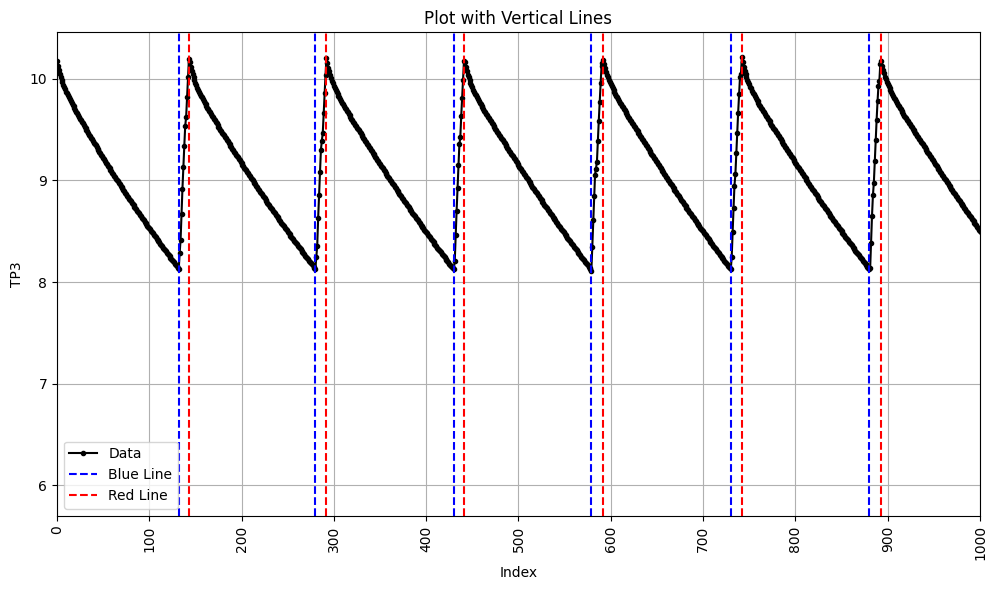

In [3]:
plt.figure(figsize=(10, 6))
# Extract the first and third columns
#x = data.iloc[:400, 0]  # First column (datetime)
aux = int(0)
data_interval = range(aux, aux+10000)
x = data_interval
y = testdf.iloc[data_interval, 3]  # Third column
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')


# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=idx, color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=idx, color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Add labels, title, and grid
plt.xlabel('Index')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
tick_spacing = 100  # Adjust this for denser or sparser ticks
ticks = range(aux, aux + 1000 + 1, tick_spacing)
plt.xticks(ticks, rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.xlim(0, 1000)


# Add a legend
plt.legend()

# Show the plot
plt.show()

In [4]:
'''export_data = pd.DataFrame({
    'Minima Indices': pd.Series(minima_indices_fixed),
    'Maxima Indices': pd.Series(maxima_indices_fixed)
})

# Export the DataFrame to a CSV file
export_data.to_csv('maxima_minima_indices_fixed.csv', index=False)'''

"export_data = pd.DataFrame({\n    'Minima Indices': pd.Series(minima_indices_fixed),\n    'Maxima Indices': pd.Series(maxima_indices_fixed)\n})\n\n# Export the DataFrame to a CSV file\nexport_data.to_csv('maxima_minima_indices_fixed.csv', index=False)"

#### Converting the timestamp insto seconds since first measurement (01/02/2020  00:00:00)

In [5]:
# Calculate seconds since the first entry
timestart = testdf["timestamp"].iloc[0]
testdf["timestamp"] = (testdf["timestamp"] - testdf["timestamp"].iloc[0]).dt.total_seconds()
print(timestart)

2020-05-01 21:37:59


C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_17684\576912012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["timestamp"] = (testdf["timestamp"] - testdf["timestamp"].iloc[0]).dt.total_seconds()


In [6]:
testdf.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
644134,6441340,0.0,-0.026,10.170,10.172,-0.024,10.172,58.525,3.6000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644135,6441350,10.0,-0.024,10.122,10.120,-0.024,10.124,58.675,3.5825,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644136,6441360,20.0,-0.022,10.084,10.080,-0.024,10.084,58.425,3.6125,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644137,6441370,30.0,-0.020,10.050,10.042,-0.024,10.050,58.500,3.7150,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
644138,6441380,40.0,-0.018,10.018,10.010,-0.024,10.018,58.725,3.5575,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


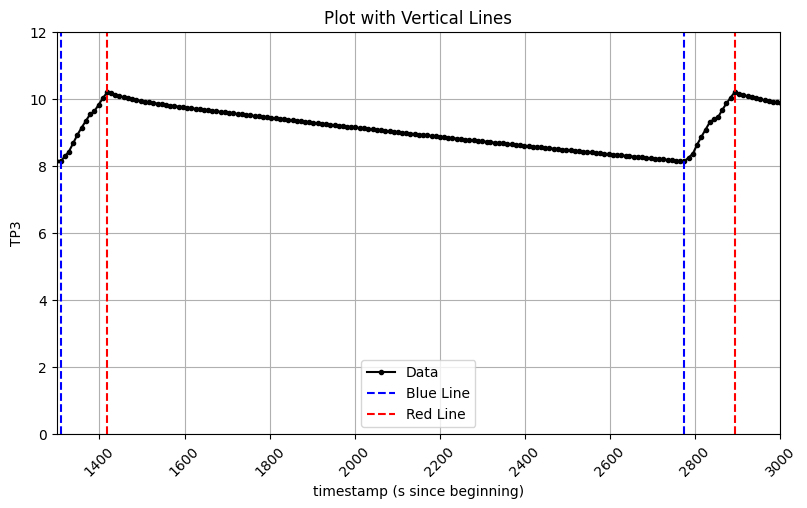

In [7]:
aux=0
x = testdf.iloc[aux:aux+4000, 1] #Timestamp
y = testdf.iloc[aux:aux+4000, 3] #TP3
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
aux=0
plt.xlim(1300, 3000)
plt.ylim(0, 12)

# Show the plot
plt.show()

#### Calculating $T_{run}$ and $T_{idle}$ vectors

In [8]:
# Assuming maxima_indices and minima_indices are lists of indices
# Assuming timestamps is a list or array of timestamps corresponding to the indices

def compute_trun_tidle(testdf, maxima_indices, minima_indices):
    # Initialize lists to store Trun and Tidle values
    Trun = []
    trun = []

    Tidle = []
    tidle = []

    # Compute Trun
    for max_idx in maxima_indices:
        # Find the closest minima index with a smaller index value
        valid_minima_indices = [min_idx for min_idx in minima_indices if min_idx < max_idx]
        if valid_minima_indices:
            closest_min_idx = max(valid_minima_indices)
            trun_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Trun.append(trun_value)
            trun.append(testdf.iloc[closest_min_idx, 1])

    # Compute Tidle
    for min_idx in minima_indices[1:]:  # Start from the second element
        # Find the closest maxima index with a smaller index value
        valid_maxima_indices = [max_idx for max_idx in maxima_indices if max_idx < min_idx]
        if valid_maxima_indices:
            closest_max_idx = max(valid_maxima_indices)
            tidle_value = abs(testdf.iloc[min_idx, 1] - testdf.iloc[closest_max_idx, 1])#.total_seconds()
            Tidle.append(tidle_value)
            tidle.append(testdf.iloc[closest_max_idx, 1])

    return Trun, Tidle, trun, tidle

Trun, Tidle, trun, tidle = compute_trun_tidle(testdf, maxima_indices, minima_indices)

print("Trun:", Trun)
print('trun:', trun,'\n')
print("Tidle:", Tidle)
print('tidle:', tidle) 

Trun: [np.float64(109.0), np.float64(119.0), np.float64(109.0), np.float64(129.0), np.float64(119.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(119.0), np.float64(148.0), np.float64(119.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(119.0), np.float64(119.0), np.float64(139.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(118.0), np.float64(139.0), np.float64(119.0), np.float64(128.0), np.float64(129.0), np.float64(129.0), np.float64(168.0), np.float64(278.0), np.float64(129.0), np.float64(119.0), np.float64(129.0), np.float64(128.0), np.float64(129.0), np.float64(188.0), np.float64(218.0), np.float64(129.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(129.0), np.float64(119.0), np.float64(129.0), np.float64(129.0), np.float64(128.0), np.float64(119.0), np.float64(149.0), np.float64(129.0), np.float64(198.0), np.float64(129.0), np.float64(129.0), np.float64(128.0), np.float64(158.0), np.fl

In [9]:
# Assuming maxima_indices and minima_indices are lists of indices
# Assuming timestamps is a list or array of timestamps corresponding to the indices

def compute_trun_tidle(testdf, maxima_indices, minima_indices):
    # Initialize lists to store Trun and Tidle values
    Trun = []
    trun = []

    Tidle = []
    tidle = []

    # Compute Trun
    for max_idx in maxima_indices:
        # Find the closest minima index with a smaller index value
        valid_minima_indices = [min_idx for min_idx in minima_indices if min_idx < max_idx]
        if valid_minima_indices:
            closest_min_idx = max(valid_minima_indices)
            trun_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Trun.append(trun_value)
            trun.append(testdf.iloc[closest_min_idx, 1])
        
        valid_minima_indices_2 = [min_idx for min_idx in minima_indices if min_idx > max_idx]
        if valid_minima_indices_2:
            closest_min_idx = min(valid_minima_indices_2)
            tidle_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Tidle.append(tidle_value)
            tidle.append(testdf.iloc[closest_min_idx, 1])
        

    return Trun, Tidle, trun, tidle

Trun, Tidle, trun, tidle = compute_trun_tidle(testdf, maxima_indices, minima_indices)

print("Trun:", Trun)
print('trun:', trun,'\n')
print("Tidle:", Tidle)
print('tidle:', tidle) 

Trun: [np.float64(109.0), np.float64(119.0), np.float64(109.0), np.float64(129.0), np.float64(119.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(119.0), np.float64(148.0), np.float64(119.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(119.0), np.float64(119.0), np.float64(139.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(118.0), np.float64(139.0), np.float64(119.0), np.float64(128.0), np.float64(129.0), np.float64(129.0), np.float64(168.0), np.float64(278.0), np.float64(129.0), np.float64(119.0), np.float64(129.0), np.float64(128.0), np.float64(129.0), np.float64(188.0), np.float64(218.0), np.float64(129.0), np.float64(129.0), np.float64(119.0), np.float64(119.0), np.float64(129.0), np.float64(119.0), np.float64(129.0), np.float64(129.0), np.float64(128.0), np.float64(119.0), np.float64(149.0), np.float64(129.0), np.float64(198.0), np.float64(129.0), np.float64(129.0), np.float64(128.0), np.float64(158.0), np.fl

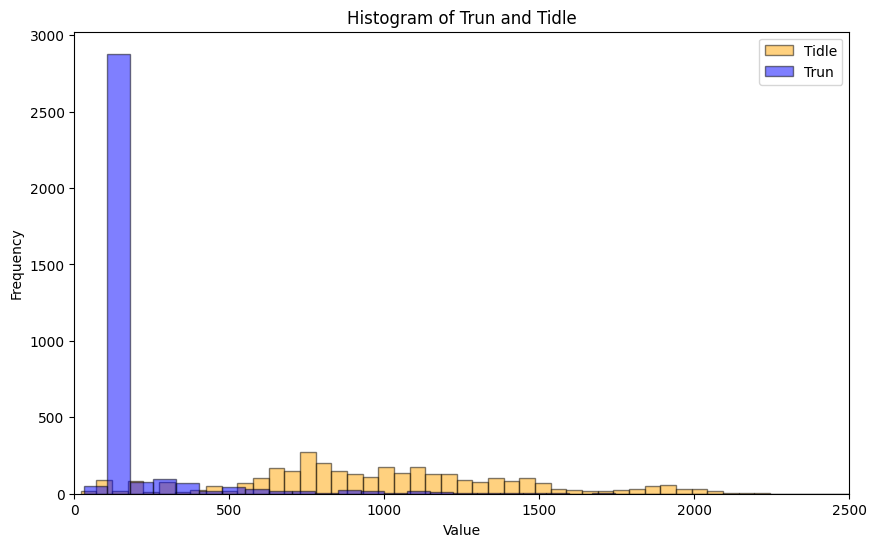

In [10]:
plt.figure(figsize=(10, 6))

plt.hist(Tidle, bins=3000, alpha=0.5, label='Tidle', color='orange', edgecolor='black')
plt.hist(Trun, bins=3000, alpha=0.5, label='Trun', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Trun and Tidle')
plt.legend()

plt.xlim(0,2500)
# Show the plot
plt.show()

#### Creating coordinates for box centers

In [11]:
Box_centers = np.zeros((min(len(Trun), len(Tidle)), 7))
Trun_fixed = []
Tidle_fixed = []

# Populate the matrix
for i in range(Box_centers.shape[0]):
    Trun_aux = Trun[i]
    Tidle_aux = Tidle[i]
    
    # First two components: Trun_1 * (1/4, 3/4)
    Box_centers[i, 0] = trun[i] + Trun_aux * (1 / 4)
    Box_centers[i, 1] = trun[i] + Trun_aux * (3 / 4)
    


    fractions = [1/10, 3/10, 5/10, 7/10, 9/10]
    valid_tidle_indices = [k for k in range(len(Tidle)) if tidle[k] > trun[i]]
    if valid_tidle_indices:
        k = min(valid_tidle_indices)
        for j, fraction in enumerate(fractions, start=2):
            Box_centers[i, j] = trun[i] + Trun_aux + Tidle[k] * fraction   

    '''   # Remaining five components: Tidle_1 * (1/10, 3/10, 5/10, 7/10, 9/10)
    fractions = [1/10, 3/10, 5/10, 7/10, 9/10]
    for j, fraction in enumerate(fractions, start=2):
        Box_centers[i, j] = trun[i] + Trun_aux +  * fraction'''

#### Plotting graph with box centres

c:\Users\JoãoMarquesDias\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


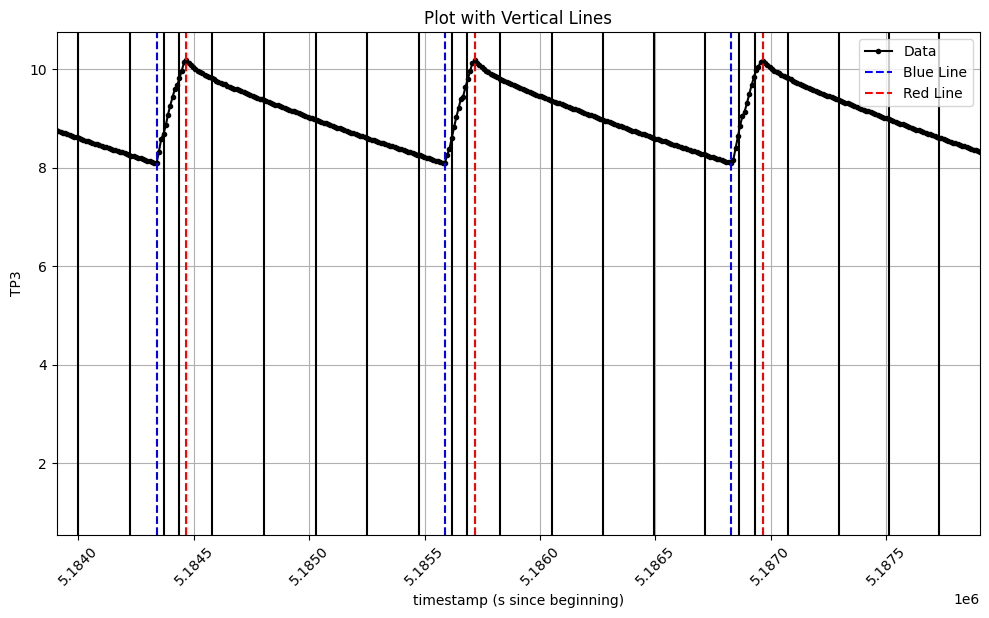

In [12]:
x = testdf.iloc[:, 1] #Timestamp
y = testdf.iloc[:, 3] #TP3
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Plot red vertical lines
for i in range(Box_centers.shape[0]):    
    for idx in Box_centers[i, :]:
        plt.axvline(x=idx, color='black', linestyle='-', label='')

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
aux=200000
plt.xlim(5183907, 5187907)

# Show the plot
plt.show()

#### Determining $B_n(TP3)$

In [13]:
Boxes_tp3_flattened = []
Boxes_tp3_flattened.append(float(testdf.iloc[135, 3])) #See first value by eye
Box_centers_flattened = Box_centers.flatten().tolist()

for i in range(1, len(Box_centers_flattened)-1):
    flag_min=1e5
    aux = 0
    for j in testdf[(testdf['timestamp']>=Box_centers_flattened[i-1]) & (testdf['timestamp']<=Box_centers_flattened[i+1])]['timestamp'].to_list():
        if abs(Box_centers_flattened[i] - j) < flag_min:
            flag_min = abs(Box_centers_flattened[i] - j)
            aux = j
    Boxes_tp3_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP3']))

Boxes_tp3_flattened.append(float(testdf.iloc[429123, 3])) #See last one by eye
print(len(Boxes_tp3_flattened)/7)
#Unflatten the list
Boxes_tp3 = np.reshape(Boxes_tp3_flattened, (Box_centers.shape[0], 7))



C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_17684\2769449080.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_tp3_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP3']))


3416.0


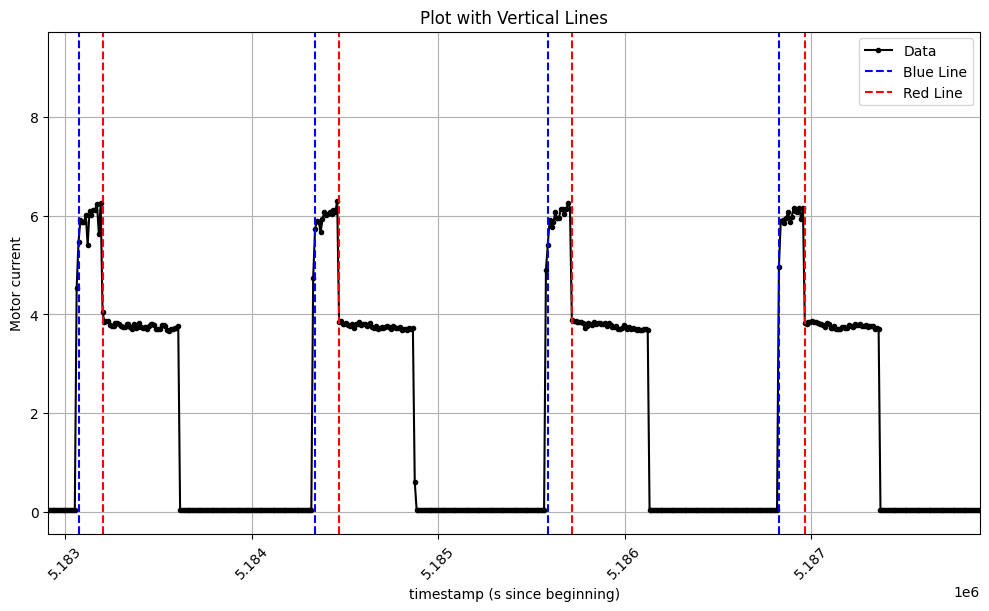

In [14]:
x = testdf.iloc[:, 1] #Timestamp
y = testdf.iloc[:, 8] #TP3
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Plot red vertical lines
for idx in Box_centers[0, :]:
    plt.axvline(x=idx, color='black', linestyle='-', label='')

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('Motor current')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
aux=200000
plt.xlim(5182907, 5187907)

# Show the plot
plt.show()

#### Determining $B_n(Mc)$

In [15]:
Boxes_mc_flattened = []
Boxes_mc_flattened.append(float(testdf.iloc[135,8])) #See first value by eye

for i in range(1, len(Box_centers_flattened)-1):
    flag_min=1e5
    aux = 0
    for j in testdf[(testdf['timestamp']>=Box_centers_flattened[i-1]) & (testdf['timestamp']<=Box_centers_flattened[i+1])]['timestamp'].to_list():
        if abs(Box_centers_flattened[i] - j) < flag_min:
            flag_min = abs(Box_centers_flattened[i] - j)
            aux = j
    Boxes_mc_flattened.append(float(testdf[testdf['timestamp'] == aux]['Motor_current']))

Boxes_mc_flattened.append(float(testdf.iloc[429123, 8])) #See last one by eye

Boxes_mc = np.reshape(Boxes_mc_flattened, (Box_centers.shape[0], 7))



C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_17684\2693792827.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_mc_flattened.append(float(testdf[testdf['timestamp'] == aux]['Motor_current']))


In [16]:
from datetime import datetime

# Corrected datetime format
(datetime(2020, 6, 30, 23, 26, 26).timestamp() - timestart.timestamp())

5186907.0

#### Creating the May/June dataset

In [17]:
# Reshape Trun and Tidle to be 2-dimensional arrays
Trun_reshaped = np.array(Trun[:-1]).reshape(-1, 1)
Tidle_reshaped = np.array(Tidle).reshape(-1, 1)

# Concatenate the arrays
X_test_analog = pd.DataFrame(np.hstack((Boxes_tp3, Boxes_mc, Trun_reshaped, Tidle_reshaped)), columns=['TP3_1', 'TP3_2', 'TP3_3', 'TP3_4', 'TP3_5' ,'TP3_6', 'TP3_7', 'MC_1', 'MC_2', 'MC_3', 'MC_4', 'MC_5', 'MC_6', 'MC_7', 'Trun', 'Tidle'])

$$\bold{X}_{Analog} = \left(B_1(TP3), B_2(TP3), ..., B_7(TP3);\quad B_1(Mc), ..., B_7(Mc);\quad T_{run}, T_{idle}\right)$$

$$\bold{X}_{Digi} =  \left(\sum_{T_{cycle}}D_1, \sum_{T_{cycle}}D_2, ..., \sum_{T_{cycle}}D_7;\quad T_{run}, T_{idle}\right)$$

#### Check which lines of $X^{test}_{analog}$ are normal and which are anomalous

In [18]:
from datetime import datetime

# Define the intervals as a list of tuples (start_timestamp, end_timestamp)
# The datetime() function expects the date format as: datetime(year, month, day, hour, minute)
anomaly_flag = []
intervals = [
    (datetime(2020, 5, 13, 14, 0), datetime(2020, 5, 13, 23, 59)),
    (datetime(2020, 5, 18, 5, 0), datetime(2020, 5, 18, 5, 30)),
    (datetime(2020, 5, 19, 10, 10), datetime(2020, 5, 19, 11, 0)),
    (datetime(2020, 5, 19, 22, 10), datetime(2020, 5, 19, 23, 59)),
    (datetime(2020, 5, 20, 0, 0), datetime(2020, 5, 20, 20, 0)),
    (datetime(2020, 5, 23, 9, 50), datetime(2020, 5, 23, 10, 10)),
    (datetime(2020, 5, 29, 23, 30), datetime(2020, 5, 29, 23, 59)),
    (datetime(2020, 5, 30, 0, 0), datetime(2020, 5, 30, 6, 0)),
    (datetime(2020, 6, 1, 15, 0), datetime(2020, 6, 1, 15, 40)),
    (datetime(2020, 6, 3, 10, 0), datetime(2020, 6, 3, 11, 0)),
    (datetime(2020, 6, 5, 10, 0), datetime(2020, 6, 5, 23, 59)),
    (datetime(2020, 6, 6, 0, 0), datetime(2020, 6, 6, 23, 59)),
    (datetime(2020, 6, 7, 0, 0), datetime(2020, 6, 7, 14, 30))
]

# Function to check if a timestamp is in any of the intervals
def is_timestamp_in_intervals(timestamp, intervals):
    for start, end in intervals:
        if start <= timestamp <= end:
            return True
    return False


for i in trun:
    timestamp = pd.to_datetime(i + timestart.timestamp(), unit='s')
    in_interval = 1 if is_timestamp_in_intervals(timestamp, intervals) else 0
    anomaly_flag.append(in_interval)#[timestamp, in_interval])

In [19]:
timesteps = []
for i in trun:
    timesteps.append(pd.to_datetime(i + timestart.timestamp(), unit='s'))

# Concatenate the DataFrames horizontally
X_analog_may_june_not_normalized = pd.concat([pd.DataFrame(X_test_analog),
                       #pd.DataFrame(timesteps[:-1], columns=['Timestamp']),
                       pd.DataFrame(anomaly_flag[:-1], columns=['anomaly_flag'])], axis=1)

In [20]:
X_analog_may_june_not_normalized.head(5)

,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,Trun,Tidle,anomaly_flag
0,8.668,9.624,9.816,9.398,9.014,8.638,8.296,5.7700,5.8475,3.4925,3.5950,0.0400,0.0400,0.0400,109.0,1357.0,0
1,8.626,9.660,9.818,9.406,9.006,8.630,8.294,5.9200,6.2050,3.9325,3.9350,0.0425,0.0400,0.0400,119.0,1368.0,0
2,8.700,9.632,9.818,9.408,9.010,8.630,8.288,5.9900,6.1200,3.8875,3.7425,0.0400,0.0400,0.0400,109.0,1367.0,0
3,8.842,9.958,9.832,9.424,9.022,8.640,8.296,6.0225,6.2400,3.8925,3.7250,0.0425,0.0425,0.0425,129.0,1369.0,0
4,8.726,9.846,9.830,9.418,9.020,8.640,8.298,6.0275,6.1850,3.9000,3.8100,0.0425,0.0425,0.0425,119.0,1367.0,0


In [21]:
features = X_analog_may_june_not_normalized.iloc[:, :-1]
target = X_analog_may_june_not_normalized.iloc[:, -1]

# Apply the StandardScaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
#Apply the MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame and keep the column names
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
min_max_scaled_features_df = pd.DataFrame(min_max_scaled_features, columns=features.columns)

# Combine the scaled features and the target column
X_analog_may_june = pd.concat([scaled_features_df, target], axis=1)
X_analog_may_june_min_max = pd.concat([min_max_scaled_features_df, target], axis=1)

X_analog_may_june_min_max.head(5)

,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,Trun,Tidle,anomaly_flag
0,0.798606,0.822682,0.909808,0.859021,0.736674,0.673348,0.795370,0.929178,0.925587,0.565838,0.582722,0.003256,0.003283,0.001674,0.000353,0.008818,0
1,0.792974,0.833960,0.910372,0.860482,0.734852,0.671642,0.795152,0.953460,0.982491,0.637587,0.638142,0.003663,0.003283,0.001674,0.000398,0.008890,0
2,0.802896,0.825188,0.910372,0.860847,0.735763,0.671642,0.794497,0.964792,0.968961,0.630249,0.606764,0.003256,0.003283,0.001674,0.000353,0.008884,0
3,0.821936,0.927318,0.914318,0.863769,0.738497,0.673774,0.795370,0.970053,0.988062,0.631064,0.603912,0.003663,0.003693,0.002093,0.000443,0.008897,0
4,0.806382,0.892231,0.913754,0.862673,0.738041,0.673774,0.795589,0.970862,0.979308,0.632287,0.617767,0.003663,0.003693,0.002093,0.000398,0.008884,0


In [22]:
np.save("npy_files/X_analog_may_june.npy", X_analog_may_june)

# ____________________________________________________________________________________________________________________

# Prepare data for LSTM approach

$$\bold{X} = \begin{pmatrix}
B_1(TP3) & B_2(TP3) & ... & B_7(TP3)\\
B_1(Mc) & B_2(Mc) & ... & B_7(Mc)\\
\sum_{B_1}D_1 & \sum_{B_2}D_1 & ... & \sum_{B_7}D_1\\
\vdots & \vdots & \ddots & \vdots\\
\sum_{B_1}D_7 & \sum_{B_2}D_7 & ... & \sum_{B_7}D_7\\
\end{pmatrix}$$

In [23]:
import numpy as np

# Function to sum entries in the specified intervals
def sum_entries_in_intervals(testdf, trun, Trun, tidle, Tidle):
    index_list = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Caudal_impulses']
    X_lstm = np.zeros((len(trun) - 1, 7, 9))  # Initialize the array with the correct shape
    
    for i in range(len(trun) - 1):
        for j in index_list:
            aux = index_list.index(j)

            interval1_start = trun[i]
            interval1_end = trun[i] + Trun[i] / 2

            interval2_start = interval1_end
            interval2_end = trun[i] + Trun[i]

            interval3_start = trun[i] + Trun[i]
            interval3_end = trun[i] + Trun[i] + Tidle[i] / 5

            interval4_start = interval3_end
            interval4_end = trun[i] + Trun[i] + (2/5)*Tidle[i]

            interval5_start = interval4_end
            interval5_end = trun[i] + Trun[i] + (3/5)*Tidle[i]

            interval6_start = interval5_end
            interval6_end = trun[i] + Trun[i] + (4/5)*Tidle[i]

            interval7_start = interval6_end
            interval7_end = trun[i] + Trun[i] + Tidle[i]

            sum_interval1 = testdf[(testdf['timestamp'] > interval1_start) & (testdf['timestamp'] <= interval1_end)][j].sum()
            sum_interval2 = testdf[(testdf['timestamp'] > interval2_start) & (testdf['timestamp'] <= interval2_end)][j].sum()
            sum_interval3 = testdf[(testdf['timestamp'] > interval3_start) & (testdf['timestamp'] <= interval3_end)][j].sum()
            sum_interval4 = testdf[(testdf['timestamp'] > interval4_start) & (testdf['timestamp'] <= interval4_end)][j].sum()
            sum_interval5 = testdf[(testdf['timestamp'] > interval5_start) & (testdf['timestamp'] <= interval5_end)][j].sum()
            sum_interval6 = testdf[(testdf['timestamp'] > interval6_start) & (testdf['timestamp'] <= interval6_end)][j].sum()
            sum_interval7 = testdf[(testdf['timestamp'] > interval7_start) & (testdf['timestamp'] <= interval7_end)][j].sum()

            X_lstm[i, 0, aux+2] = sum_interval1
            X_lstm[i, 1, aux+2] = sum_interval2
            X_lstm[i, 2, aux+2] = sum_interval3
            X_lstm[i, 3, aux+2] = sum_interval4
            X_lstm[i, 4, aux+2] = sum_interval5
            X_lstm[i, 5, aux+2] = sum_interval6
            X_lstm[i, 6, aux+2] = sum_interval7
    
    return X_lstm

# Calculate the sums
X_lstm = sum_entries_in_intervals(testdf, trun, Trun, tidle, Tidle)

In [24]:
num_lines, num_intervals, num_features = X_lstm.shape
flattened_digital_lstm = X_lstm.reshape(-1, num_features)

# Apply StandardScaler to normalize the values
scaler = MinMaxScaler()
normalized_flattened_digital_lstm = scaler.fit_transform(flattened_digital_lstm)

# Reshape back to the original tensor shape
X_lstm = normalized_flattened_digital_lstm.reshape(num_lines, num_intervals, num_features)

In [25]:
for i in range(len(Trun)-1):
    X_lstm[i, :, 0] = X_analog_may_june_min_max.iloc[i, :7].values  # TP3
    X_lstm[i, :, 1] = X_analog_may_june_min_max.iloc[i, 7:14].values  # Motor current

In [26]:
print(np.array2string(X_lstm[:1,:,:], formatter={'float_kind': lambda x: f"{x:.4f}"}))

[[[0.7986 0.9292 0.0000 0.0007 0.0000 0.0000 0.0000 0.0007 0.0007]
  [0.8227 0.9256 0.0000 0.0008 0.0007 0.0000 0.0000 0.0008 0.0008]
  [0.9098 0.5658 0.0133 0.0000 0.0036 0.0133 0.0000 0.0036 0.0036]
  [0.8590 0.5827 0.0133 0.0000 0.0036 0.0133 0.0000 0.0036 0.0036]
  [0.7367 0.0033 0.0138 0.0000 0.0038 0.0138 0.0000 0.0038 0.0038]
  [0.6733 0.0033 0.0133 0.0000 0.0036 0.0133 0.0000 0.0036 0.0036]
  [0.7954 0.0017 0.0133 0.0001 0.0038 0.0133 0.0000 0.0038 0.0038]]]


In [27]:
anomaly_list = X_analog_may_june_min_max['anomaly_flag'].values

In [28]:
np.unique(X_analog_may_june_min_max['anomaly_flag'])

array([0, 1])

In [29]:
np.save("npy_files/X_lstm.npy", X_lstm)
np.save("npy_files/anomaly_list.npy", anomaly_list)